In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [12]:
import os
path = os.getcwd()
df = pd.read_csv('./US/nmurx_us_19Q1.csv')
df = df.select_dtypes(exclude=["object"])
df= df.fillna(0)

NameError: name 'df2' is not defined

In [3]:
forest = ExtraTreesClassifier(n_estimators=250)

In [4]:
Y = df['ILLXCAN_WK'].values
X = df.drop(['ILLXCAN_WK'], axis=1).values
print(Y)
print(X)


[0 0 0 ... 0 0 0]
[[3.00000000e+00 1.00000000e+00 2.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 7.07413613e+03]
 [3.00000000e+00 1.00000000e+00 2.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 4.06946079e+03]
 [3.00000000e+00 1.00000000e+00 2.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 7.55461812e+03]
 ...
 [3.00000000e+00 1.00000000e+00 2.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 2.58199037e+04]
 [3.00000000e+00 1.00000000e+00 2.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.15223774e+04]
 [3.00000000e+00 1.00000000e+00 2.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.18240887e+04]]


In [5]:
forest.fit(X,Y)
importances = forest.feature_importances_

In [6]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

Feature ranking:
1 feature 511 (0.1476355195738066) ILLXCAN_MNTH
2 feature 510 (0.08315053240775543) ILLXCAN_NTY
3 feature 516 (0.0675798372434575) ILL_MNTH
4 feature 509 (0.05187271115598086) ILLXCAN_YR
5 feature 515 (0.019754571937996884) ILL_NTY
6 feature 258 (0.009312687796392) METHAM_REC
7 feature 514 (0.009235858198058944) ILL_YR
8 feature 237 (0.00917893568112384) KRAT_USE
9 feature 213 (0.008139799480937309) CAN_REC
10 feature 290 (0.007831065028216858) DAST_2


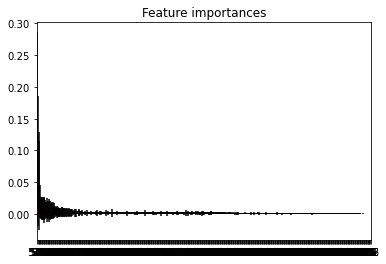

In [7]:
# Print the feature ranking
print("Feature ranking:")

for f in range(10):
    print(f"{f+1} feature {indices[f]} ({importances[indices[f]]}) {df.columns[indices[f]]}")

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [8]:
log = LogisticRegression(max_iter = 50000)
log.fit(X,Y)

KeyboardInterrupt: 

In [11]:
importance = model_coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

NameError: name 'model_coef_' is not defined

In [ ]:
decision = DecisionTreeClassifier()
decision.fit(X,Y)
feat_importance = decision.tree_.compute_feature_importances(normalize=False)
for i in range(X.shape[1]):
    if feat_importance[i] != 0:
        print(f"Feature {i} {feat_importance[i]} {df.columns[i]}")

In [20]:
DAST = 

SyntaxError: invalid syntax (<ipython-input-20-1c0907735fbc>, line 1)

In [20]:
def find_features(target_feature, df):
    Y = df[target_feature].values
    del df[target_feature]
    X = df.values
    forest = ExtraTreesClassifier(n_estimators=250)
    forest.fit(X,Y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
    indices = np.argsort(importances)[::-1]
    # Print the feature ranking
    print("Feature ranking:")

    for f in range(10):
        print(f"{f+1} feature {indices[f]} ({importances[indices[f]]}) {df.columns[indices[f]]}")

In [13]:
df2 = df[df.columns.difference(['DAST_3','DAST_SUM'])]

In [ ]:
df2 = df['']

In [18]:
df2['DAST_CAT']

0        2
1        1
2        2
3        1
4        1
        ..
29868    1
29869    2
29870    1
29871    1
29872    1
Name: DAST_CAT, Length: 29873, dtype: int64

In [21]:
find_features('DAST_CAT',df2)

Feature ranking:
1 feature 88 (0.06379811831761217) DAST_1
2 feature 92 (0.052551270989096496) DAST_5
3 feature 96 (0.022701538809435696) DAST_9
4 feature 91 (0.015126601647415309) DAST_4
5 feature 98 (0.010080651864462336) DEM_AGE10
6 feature 93 (0.009580493315166319) DAST_6
7 feature 94 (0.009349712308222922) DAST_7
8 feature 216 (0.009134473666532219) ILL_YR
9 feature 2 (0.008886719712211886) ACE_USE
10 feature 89 (0.008727742994568279) DAST_10
